## Tokenize coq proof and save tokenizer&&ruleDict

In [1]:
%load_ext autoreload
%autoreload 2
from tree_sitter_languages import get_parser
import utils
parser = get_parser("java")

import os, pickle
from tqdm import tqdm

def getProgram(file_path):
    with open(file_path, "r") as file:
        source_code = file.read()
        source_code = "\n".join(source_code.split("\n")[4:])
        utils.source_code_line = source_code.split("\n")
    tree = parser.parse(bytes(source_code, "utf8"))
    return utils.visit_program(tree.root_node)

/home/hzc/.conda/envs/ProofT5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hzc/.conda/envs/ProofT5/lib/python3.11/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


In [23]:
folder_path = "./mbjp"

from program_model import ruleDict,tokenizer

print(f"Initial tokenizer vocab size: {len(tokenizer.vocab)}")
len_cnt=[]
for root, dirs, files in os.walk(folder_path):
    for file in tqdm(files):
        # 筛选出Java程序文件
        if file.endswith(".java"):
            file_path = os.path.join(root, file)
            try:
                program = getProgram(file_path)
            except Exception as e:
                continue
            tokenize_coq = program.toCoq().tokenization()
            with open(file_path.replace(".java", ".pkl"), "wb") as wfile:
                pickle.dump(tokenizer.convert_tokens_to_ids(tokenize_coq), wfile)
            len_cnt.append(len(tokenize_coq))
            if len(tokenize_coq) > 512:
                print(len(tokenize_coq))

print(f"Final tokenizer vocab size: {len(tokenizer.vocab)}")

#dump tokenizer and ruleDict and vocab
with open("Data/tokenizer.pkl", "wb") as wfile:
    pickle.dump(tokenizer, wfile)
with open("Data/ruleDict.pkl", "wb") as wfile:
    pickle.dump(ruleDict, wfile)
with open("Data/Tokenizer_vocab.json", "w") as file:
    print(tokenizer.vocab, file=file)

top_keys=list(sorted(ruleDict.keys(),key=lambda x:ruleDict[x],reverse=True))
top_keys

Initial tokenizer vocab size: 32217


100%|██████████| 2524/2524 [00:23<00:00, 106.00it/s]

Final tokenizer vocab size: 32399


['tup2',
 'EVEN',
 'ODD',
 'mls',
 '645',
 '280',
 'minK',
 'MinK',
 '231',
 '217',
 '271',
 'lst2',
 'lst1',
 '496',
 '1900',
 '\\\\s',
 '2664',
 '273',
 'set2',
 'set1',
 'cdba',
 '3369',
 '244',
 'n = ',
 'tnAp',
 'TnAp',
 '252',
 'itr',
 'T_BitNot',
 '1011',
 '7011',
 '3108',
 '707',
 'nBit',
 '2013',
 '[{}]',
 '[][]',
 '[[]',
 'odds',
 'sStr',
 'nStr',
 'maxx',
 '959',
 '223',
 'quickly',
 'careful',
 '%20',
 'tnGp',
 'TnGp',
 '429',
 '4862',
 'atleast',
 'hAge',
 'T_PreInc',
 'st2',
 'st1',
 '\\\\Z',
 '\\\\A',
 'Gcd',
 'bLen',
 'aLen',
 'gcd',
 'doesnt',
 'sum2',
 '324',
 '1800',
 'sum1',
 '321',
 'x = ',
 'Road',
 'Lcm',
 'len2',
 'len1',
 'excl',
 'incl',
 'T_ShiftR',
 'T_BitOr',
 'solutions',
 'MSP',
 'l2s',
 'l1s',
 'strr',
 '3000',
 '1500',
 'T_ShiftL',
 'tup',
 'to@',
 'Odd',
 '259',
 '408',
 'tup1',
 'lis',
 'lps',
 'Lps',
 'Dog',
 '1994',
 '1998',
 '1997',
 'T_Continue',
 'T_InstanceOf',
 '1221',
 'greater',
 'those',
 'entered',
 '\\\\W+',
 'sums',
 'arr2',
 'arr1',
 'T_

#### Tokenized proof's length distribution

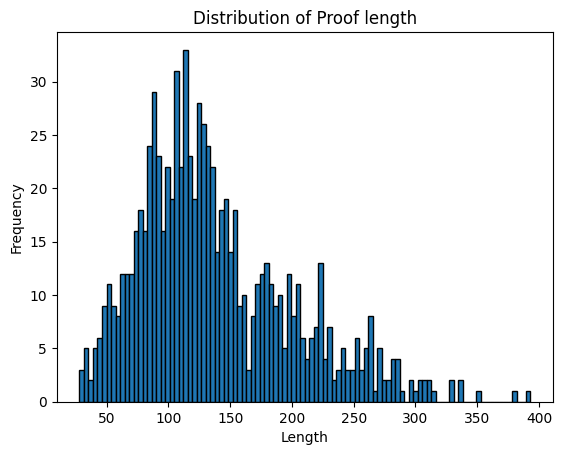

In [21]:
import matplotlib.pyplot as plt
def plot_distribution(values):
    # 绘制直方图
    plt.hist(values, bins=100, edgecolor='black')  # 这里的bins可以调整为适合你数据的数量
    plt.title('Distribution of Proof length')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()
plot_distribution(len_cnt)    

In [22]:
tokenizer=pickle.load(open("Data/tokenizer.pkl", "rb"))
ruleDict=pickle.load(open("Data/ruleDict.pkl", "rb"))

encoding=pickle.load(open("mbjp/MBJP_10.pkl", "rb"))
print(len(encoding))
print(encoding)

tokens=tokenizer.convert_ids_to_tokens(encoding)
print(len(tokens))
print(tokens)

132
[32217, 19187, 50, 2107, 225, 32219, 482, 3845, 225, 32113, 682, 32100, 12019, 50, 2107, 225, 32220, 32221, 32113, 682, 32100, 32312, 88, 21, 225, 32220, 32221, 32100, 82, 225, 32222, 32220, 32232, 32255, 32237, 32229, 32312, 88, 21, 225, 32238, 32228, 32230, 1467, 225, 32229, 32312, 88, 21, 225, 32225, 32229, 82, 225, 32236, 32238, 32220, 32232, 32237, 32230, 1467, 225, 32229, 32312, 88, 21, 225, 32225, 32227, 20, 225, 32236, 32229, 32312, 88, 21, 225, 32220, 32220, 32223, 32113, 682, 32100, 32312, 88, 22, 225, 32224, 32112, 19558, 32234, 32229, 32312, 88, 21, 225, 32225, 32222, 32220, 32235, 32248, 3804, 225, 32109, 15150, 32234, 32229, 32312, 88, 22, 225, 32225, 32220, 32236, 32230, 32130, 225, 32229, 32312, 88, 22, 225, 32234, 32227, 20, 225, 32234, 32229, 82, 225, 32225, 32222]
132
['T_ClassDecl', 'Small', 'N', 'num', 'Ġ', 'T_MethodDecl', 'public', 'static', 'Ġ', 'TyGeneric1', 'List', 'TyInt', 'small', 'N', 'num', 'Ġ', 'T_Concat', 'T_DeclNoInit', 'TyGeneric1', 'List', 'TyInt',